# Forecasting Exercises
This exercise uses a  time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [235]:
# RUN THIS CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


In [82]:
df.index = pd.to_datetime(df.index)
df

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
1990-06-01,1123.5
1990-07-01,1134.2
1990-08-01,1137.4
1990-09-01,1128.8


In [83]:
df[228:]

,Employees
Date,
2009-01-01,1489.8
2009-02-01,1491.4
2009-03-01,1494.2
2009-04-01,1504.5
2009-05-01,1522.2
2009-06-01,1529.1
2009-07-01,1526.0
2009-08-01,1522.5
2009-09-01,1504.5


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

Text(0, 0.5, '# of Employees')

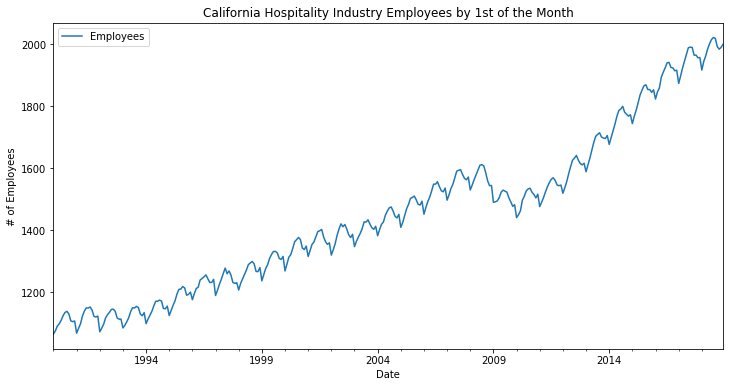

In [84]:
## CODE HERE
ax = df.plot(figsize=(12,6))
ax.set_title('California Hospitality Industry Employees by 1st of the Month')
ax.set_ylabel('# of Employees')





In [85]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

In [133]:
monthly_employee = pd.DataFrame(df,columns=['Employees'])


yearly_employee = monthly_employee.resample('Y').sum()
yearly_employee = pd.DataFrame(yearly_employee,columns=['Employees'])

monthly_employee

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
1990-06-01,1123.5
1990-07-01,1134.2
1990-08-01,1137.4
1990-09-01,1128.8


<Figure size 432x288 with 0 Axes>

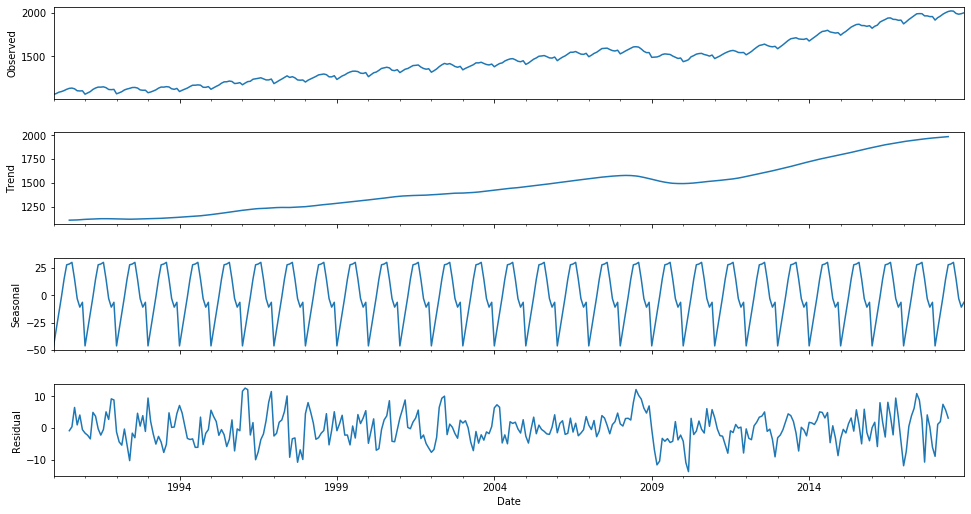

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_employee, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [89]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [90]:
monthly_employee.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [91]:
# DON'T WRITE HERE

### 3. Test to see if the data is currently stationary. If not transform the data to make it more stationary.  




In [141]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


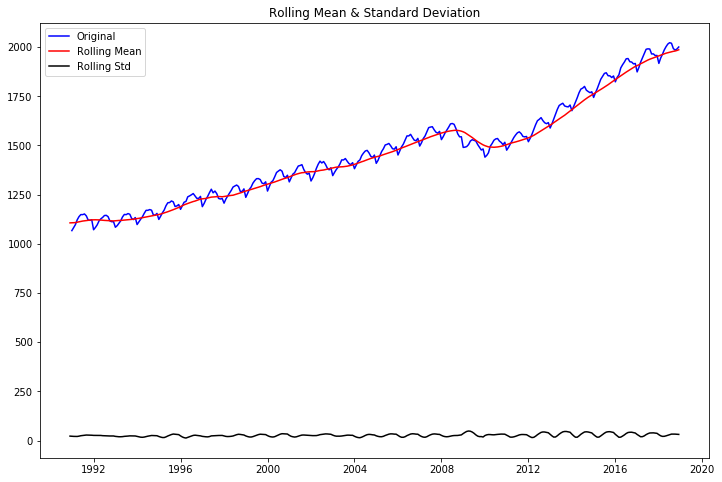

Results of Dickey-Fuller Test:
Test Statistic                   0.901284
p-value                          0.993107
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [142]:
test_stationarity(monthly_employee.Employees,12)

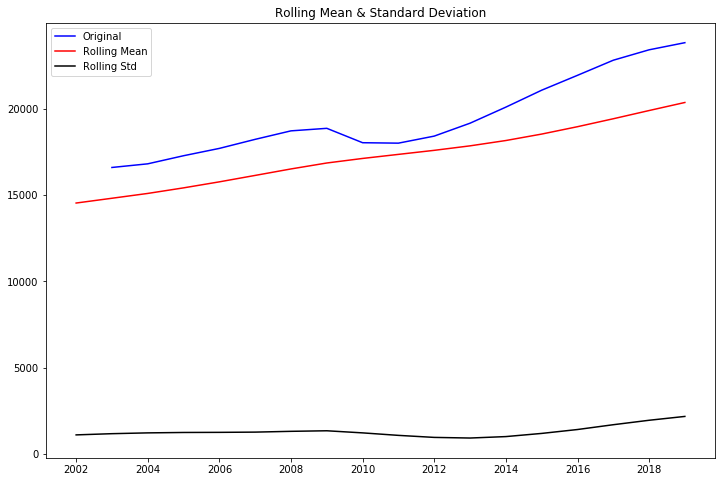

Results of Dickey-Fuller Test:
Test Statistic                  0.597345
p-value                         0.987550
#Lags Used                      2.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [157]:
test_stationarity(yearly_employee.Employees,12)

# Log Transformation

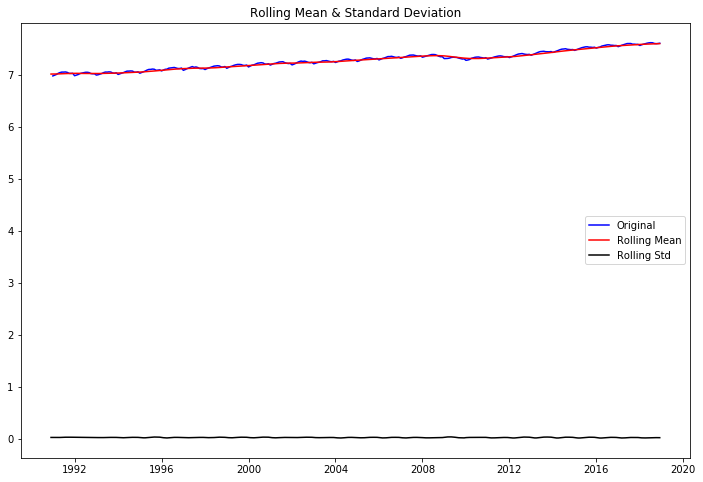

Results of Dickey-Fuller Test:
Test Statistic                   0.376334
p-value                          0.980588
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [158]:
# monthly Natural Log Transformation
monthly_employee['natural_log'] = monthly_employee.Employees.apply(lambda x: np.log(x))  
test_stationarity(monthly_employee.natural_log, 12)

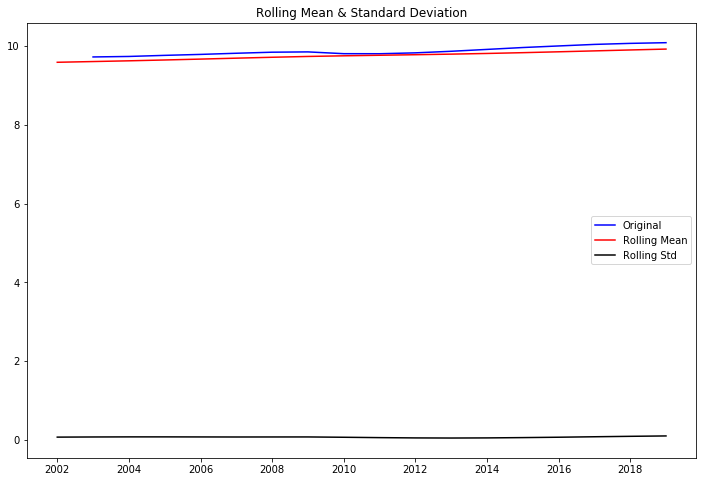

Results of Dickey-Fuller Test:
Test Statistic                  0.039556
p-value                         0.961684
#Lags Used                      2.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [159]:
# Yearly Natural Log Transformation
yearly_employee['natural_log'] = yearly_employee.Employees.apply(lambda x: np.log(x))  
test_stationarity(yearly_employee.natural_log, 12)

# First Difference

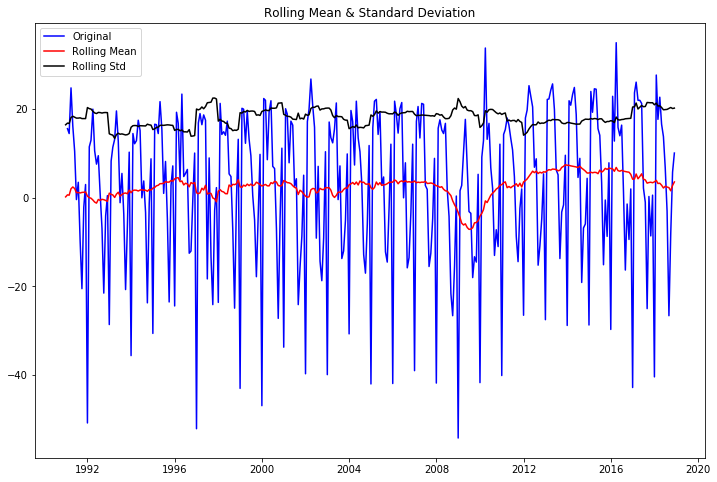

Results of Dickey-Fuller Test:
Test Statistic                  -3.068279
p-value                          0.028992
#Lags Used                      17.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64


In [160]:
# Monthly First Difference
monthly_employee['first_difference'] = monthly_employee.Employees - monthly_employee.Employees.shift(1)  
test_stationarity(monthly_employee.first_difference.dropna(inplace=False),12)

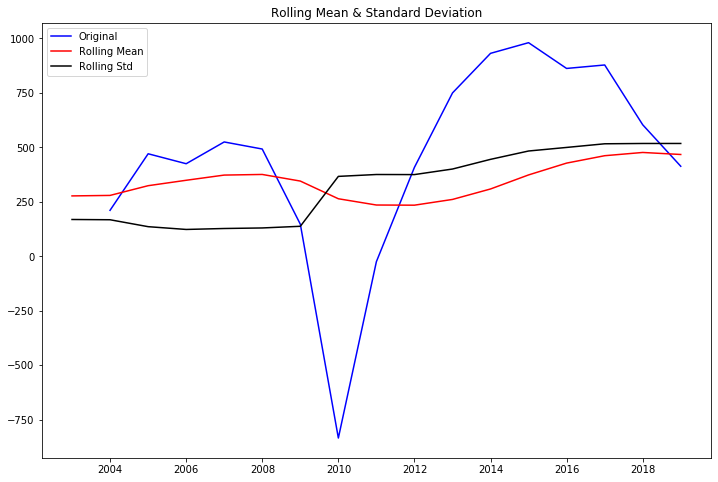

Results of Dickey-Fuller Test:
Test Statistic                 -2.443152
p-value                         0.129926
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [161]:
# yearly First Difference
yearly_employee['first_difference'] = yearly_employee.Employees - yearly_employee.Employees.shift(1)  
test_stationarity(yearly_employee.first_difference.dropna(inplace=False),12)

# Seasonal Difference

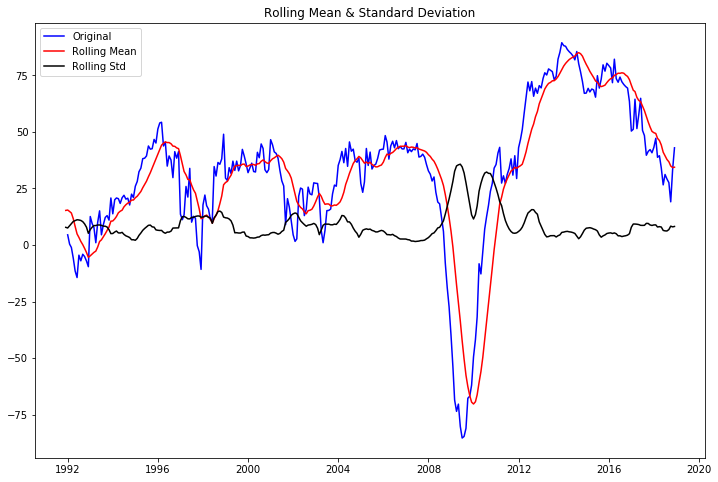

Results of Dickey-Fuller Test:
Test Statistic                  -2.570485
p-value                          0.099252
#Lags Used                      15.000000
Number of Observations Used    320.000000
Critical Value (1%)             -3.450952
Critical Value (5%)             -2.870615
Critical Value (10%)            -2.571605
dtype: float64


In [162]:
# Monthly Seasonal Difference
monthly_employee['seasonal_difference'] = monthly_employee.Employees - monthly_employee.Employees.shift(12)  
test_stationarity(monthly_employee.seasonal_difference.dropna(inplace=False), 12)

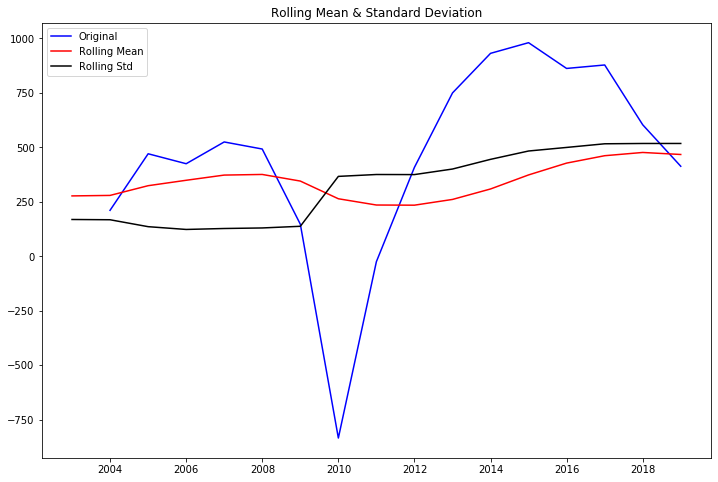

Results of Dickey-Fuller Test:
Test Statistic                 -2.443152
p-value                         0.129926
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [163]:
# Yearly Seasonal Difference
yearly_employee['seasonal_difference'] = yearly_employee.Employees - yearly_employee.Employees.shift(1)  
test_stationarity(yearly_employee.seasonal_difference.dropna(inplace=False),12)

# Seasonal Difference of the First Difference

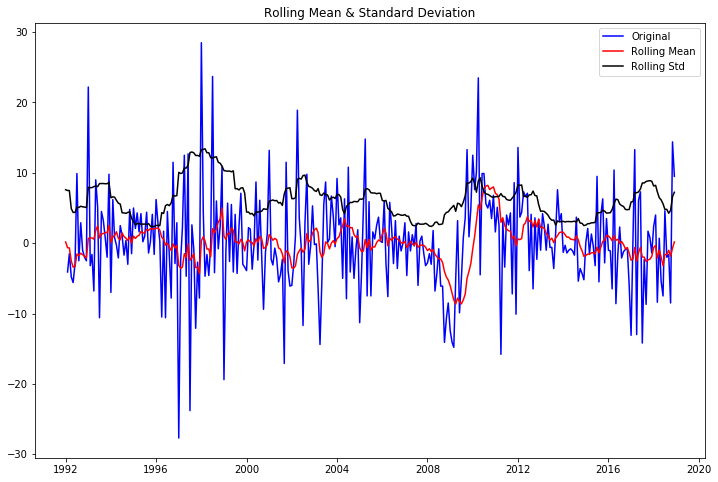

Results of Dickey-Fuller Test:
Test Statistic                -6.555191e+00
p-value                        8.651806e-09
#Lags Used                     1.100000e+01
Number of Observations Used    3.230000e+02
Critical Value (1%)           -3.450759e+00
Critical Value (5%)           -2.870530e+00
Critical Value (10%)          -2.571560e+00
dtype: float64


In [164]:
# Monthly Season Difference of the log First Difference
monthly_employee['seasonal_first_difference'] = monthly_employee.first_difference - monthly_employee.first_difference.shift(12)  
test_stationarity(monthly_employee.seasonal_first_difference.dropna(inplace=False), 12)

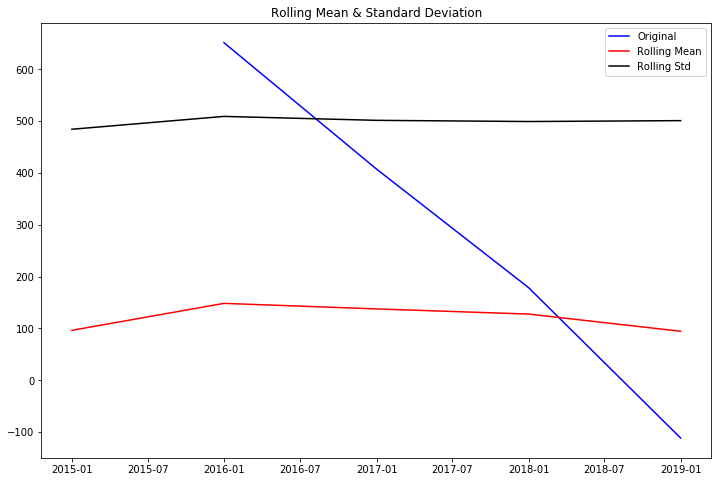

Results of Dickey-Fuller Test:
Test Statistic                 -0.844678
p-value                         0.805645
#Lags Used                      5.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [165]:
# yearly Season Difference of the log First Difference
yearly_employee['seasonal_first_difference'] = yearly_employee.first_difference - yearly_employee.first_difference.shift(12)  
test_stationarity(yearly_employee.seasonal_first_difference.dropna(inplace=False), 12)

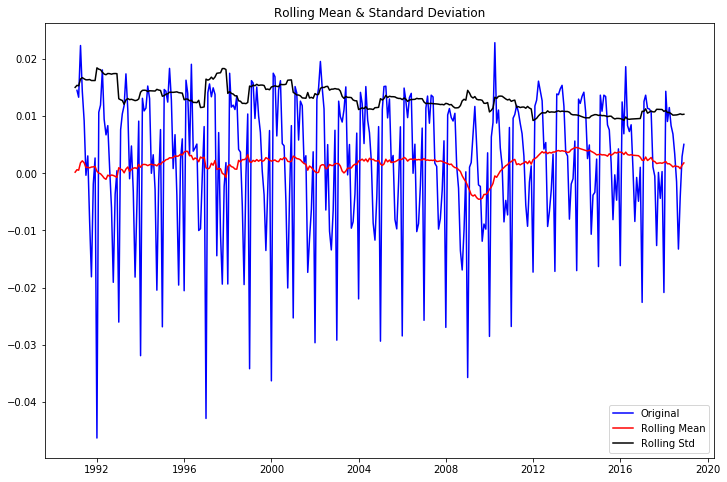

Results of Dickey-Fuller Test:
Test Statistic                  -3.273291
p-value                          0.016115
#Lags Used                      17.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64


In [172]:
# Monthly Log First Difference and Log Seasonal First Difference
monthly_employee['log_first_difference'] = monthly_employee.natural_log - monthly_employee.natural_log.shift(1)  
monthly_employee['log_seasonal_first_difference'] = monthly_employee.log_first_difference - monthly_employee.log_first_difference.shift(12)  

test_stationarity(monthly_employee.log_first_difference.dropna(inplace=False), 12)

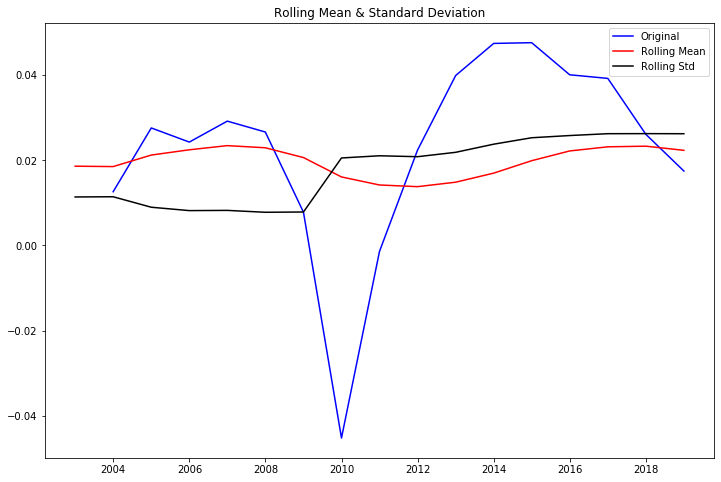

Results of Dickey-Fuller Test:
Test Statistic                 -3.442852
p-value                         0.009582
#Lags Used                      1.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [171]:
# Yearly Log First Difference and Log Seasonal First Difference
yearly_employee['log_first_difference'] = yearly_employee.natural_log - yearly_employee.natural_log.shift(1)  
yearly_employee['log_seasonal_first_difference'] = yearly_employee.log_first_difference - yearly_employee.log_first_difference.shift(12)  

test_stationarity(yearly_employee.log_first_difference.dropna(inplace=False), 12)

In [173]:
 monthly_employee

,Employees,seasonal_difference,natural_log,first_difference,seasonal_first_difference,log_first_difference,log_seasonal_first_difference
Date,,,,,,,
1990-01-01,1064.5,NaN,6.970260,NaN,NaN,NaN,NaN
1990-02-01,1074.5,NaN,6.979611,10.0,NaN,0.009350,NaN
1990-03-01,1090.0,NaN,6.993933,15.5,NaN,0.014322,NaN
1990-04-01,1097.4,NaN,7.000699,7.4,NaN,0.006766,NaN
1990-05-01,1108.7,NaN,7.010943,11.3,NaN,0.010244,NaN
1990-06-01,1123.5,NaN,7.024204,14.8,NaN,0.013261,NaN
1990-07-01,1134.2,NaN,7.033683,10.7,NaN,0.009479,NaN
1990-08-01,1137.4,NaN,7.036500,3.2,NaN,0.002817,NaN
1990-09-01,1128.8,NaN,7.028910,-8.6,NaN,-0.007590,NaN


In [174]:
yearly_employee

,Employees,natural_log,first_difference,seasonal_difference,seasonal_first_difference,log_first_difference,log_seasonal_first_difference
Date,,,,,,,
1990-12-31,13276.5,9.493751,NaN,NaN,NaN,NaN,NaN
1991-12-31,13460.1,9.507485,183.6,183.6,NaN,0.013734,NaN
1992-12-31,13394.7,9.502614,-65.4,-65.4,NaN,-0.004871,NaN
1993-12-31,13521.1,9.512007,126.4,126.4,NaN,0.009392,NaN
1994-12-31,13759.7,9.529499,238.6,238.6,NaN,0.017493,NaN
1995-12-31,14216.8,9.562180,457.1,457.1,NaN,0.032680,NaN
1996-12-31,14728.4,9.597533,511.6,511.6,NaN,0.035353,NaN
1997-12-31,14868.1,9.606973,139.7,139.7,NaN,0.009440,NaN
1998-12-31,15187.8,9.628248,319.7,319.7,NaN,0.021274,NaN



### 4. Graph the ACF and PACF plots of your stationary data to determine the possible parameters for the ARIMA or SARIMA model.

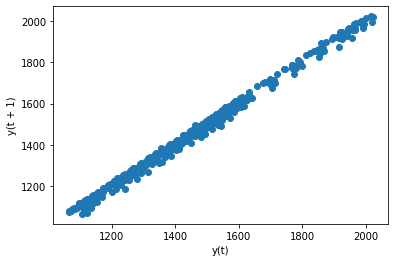

In [175]:
from pandas.plotting import lag_plot

lag_plot(monthly_employee['Employees']);

#Plotting ACF for 

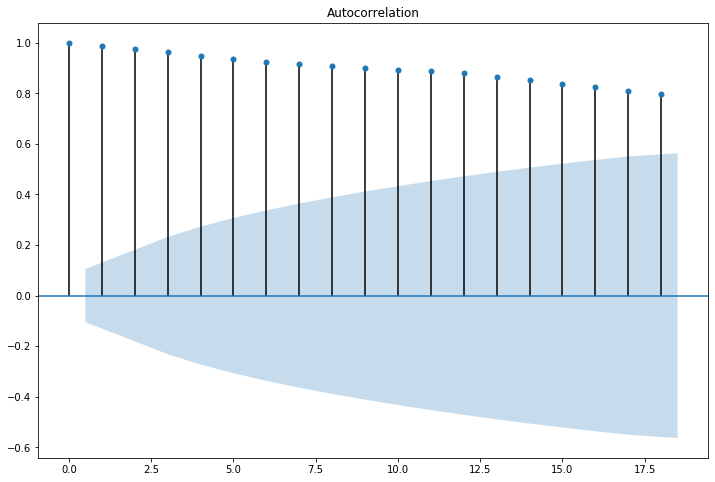

In [176]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plotting the ACF
fig = sm.graphics.tsa.plot_acf(monthly_employee.Employees.iloc[1:], lags=18, ax=ax1)

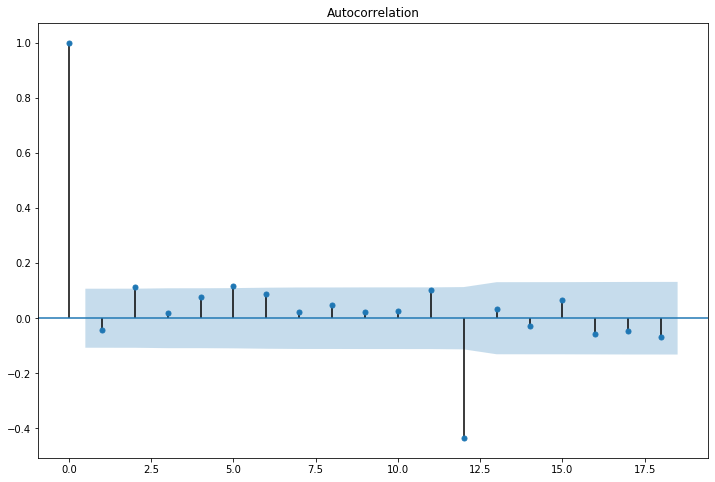

In [177]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plotting the ACF
fig = sm.graphics.tsa.plot_acf(monthly_employee.seasonal_first_difference.iloc[13:], lags=18, ax=ax1)

# Plotting PACF

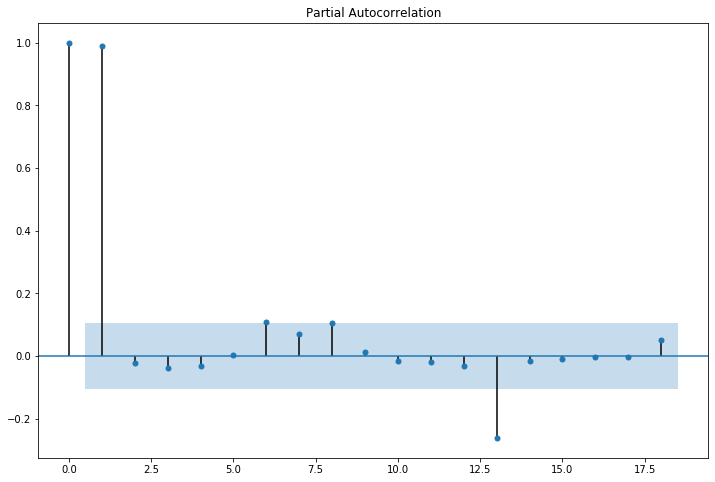

In [178]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_employee.Employees.iloc[1:], lags=18, ax=ax1)

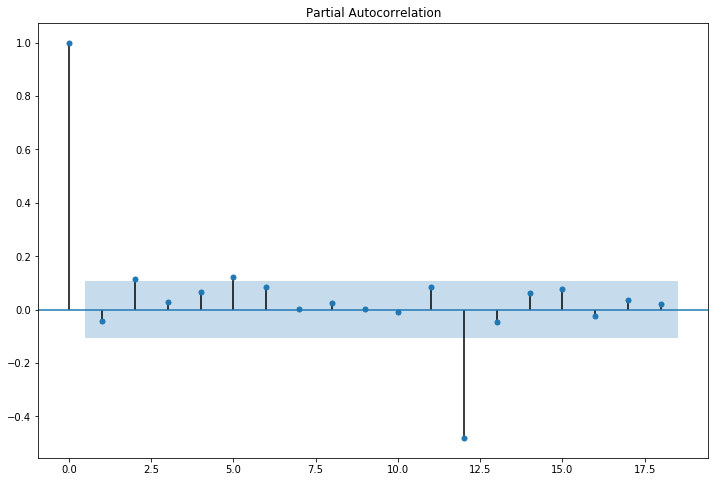

In [179]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_employee.seasonal_first_difference.iloc[13:], lags=18, ax=ax1)



In [180]:
# write your ideal parameters here.

### 5. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [181]:
from pmdarima import auto_arima                              # for determining ARIMA orders


# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(monthly_employee['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1098.236
Date:                            Fri, 20 Dec 2019   AIC                           2210.472
Time:                                    10:44:08   BIC                           2237.418
Sample:                                         0   HQIC                          2221.201
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.006      0.108      0.914      -0.011       0.012
ar.L1          0.9230      0.045     20.327      0.000       0.834       1.012
ma.L1         -0.9446      0.071    -13.393      0.000      -1.083      -0.806
ma.L2          0.1304      0.060      2.170      0.030       0.013       0.248
ar.S.L12       0.9972      0.002    640.258      0.000       0.994       1.000
ma.S.L12      -0.7495      0.043    -17.411      0.000      -0.834      -0.665
sigma2        29.2033      1.706     17.123      0.000      25.861      32.546
===================================================================================
Ljung-Box (Q):                       31.57   Jarque-Bera (JB):                67.15
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
# DON'T WRITE HERE

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 6. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [182]:
sm.tsa.statespace.SARIMAX(monthly_employee.Employees)

In [183]:
monthly_employee

,Employees,seasonal_difference,natural_log,first_difference,seasonal_first_difference,log_first_difference,log_seasonal_first_difference
Date,,,,,,,
1990-01-01,1064.5,NaN,6.970260,NaN,NaN,NaN,NaN
1990-02-01,1074.5,NaN,6.979611,10.0,NaN,0.009350,NaN
1990-03-01,1090.0,NaN,6.993933,15.5,NaN,0.014322,NaN
1990-04-01,1097.4,NaN,7.000699,7.4,NaN,0.006766,NaN
1990-05-01,1108.7,NaN,7.010943,11.3,NaN,0.010244,NaN
1990-06-01,1123.5,NaN,7.024204,14.8,NaN,0.013261,NaN
1990-07-01,1134.2,NaN,7.033683,10.7,NaN,0.009479,NaN
1990-08-01,1137.4,NaN,7.036500,3.2,NaN,0.002817,NaN
1990-09-01,1128.8,NaN,7.028910,-8.6,NaN,-0.007590,NaN


In [264]:
# Set one year for testing
train_month = monthly_employee['Employees'].iloc[:-12]
test_month = monthly_employee['Employees'].iloc[-12:]

In [309]:
# # Set one year for testing
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [266]:
# DON'T WRITE HERE

### 7. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [310]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 0),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1003.189
Date:                            Fri, 20 Dec 2019   AIC                           2012.378
Time:                                    13:11:31   BIC                           2023.597
Sample:                                01-01-1990   HQIC                          2016.862
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5240      0.040     13.012      0.000       0.445       0.603
ar.S.L24       0.4376      0.042   

In [311]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))


Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 0) x (0, 1, 0, 12)
SARIMAX: (1, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 0) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (0, 1, 0, 12)
SARIMAX: (1, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


In [312]:
y = monthly_employee['Employees']


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2239.6509352281646
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2040.0984936259117
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2092.5724239333786
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2041.9059591201305
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2235.456277665029
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2035.7787774709223
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2094.565042144126
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2037.5895331568813
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2241.0588307758608
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2041.1662052821275
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2089.0290654171295
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2043.15112099905
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2234.8665386794887
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2013.851651809951
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2089.8406977106124
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2015.6117683991015


In [313]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1078.275
Date:                            Fri, 20 Dec 2019   AIC                           2160.551
Time:                                    13:12:46   BIC                           2168.100
Sample:                                01-01-1990   HQIC                          2163.565
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0429      0.054     -0.790      0.430      -0.149       0.064
sigma2        47.4410      2.551   

In [271]:
# DON'T WRITE HERE

### 8. Obtain predicted values

In [314]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

In [315]:
predictions

2018-01-01    1914.460083
2018-02-01    1938.157504
2018-03-01    1964.257615
2018-04-01    1986.257610
2018-05-01    2008.257610
2018-06-01    2029.557610
2018-07-01    2031.757610
2018-08-01    2030.757610
2018-09-01    2005.757610
2018-10-01    2006.057610
2018-11-01    1997.457610
2018-12-01    1998.057610
Freq: MS, Name: SARIMA(0,1,0)(2,0,0,12) Predictions, dtype: float64

In [291]:
# DON'T WRITE HERE

### 9. Plot predictions against known values
Optional: add a title and y-axis label.

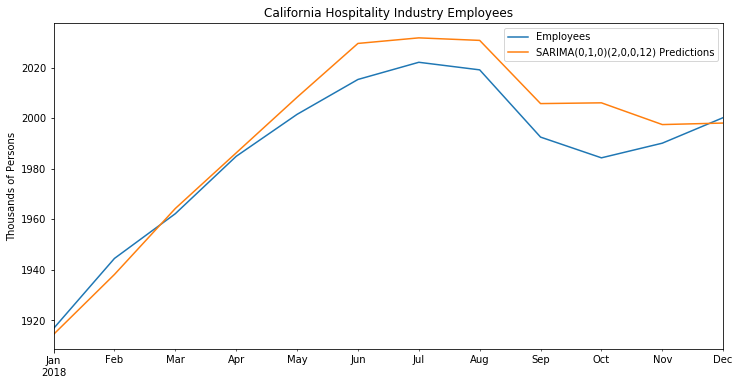

In [317]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test_month.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [276]:
# DON'T WRITE HERE

### 10. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [296]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


error = mean_squared_error(test_month, predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error:11.10}')

error = rmse(test_month, predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 103.1479578
SARIMA(0,1,0)(2,0,0,12) RMSE Error:  10.1561783


In [277]:
# DON'T WRITE HERE

### 11. Retrain the model on the full data and forecast one year into the future

In [300]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(monthly_employee['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(monthly_employee),len(monthly_employee)+11,typ='levels').rename('SARIMA(0,1,0)2,0,0,12) Forecast')



In [278]:

# DON'T WRITE HERE

### 12. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

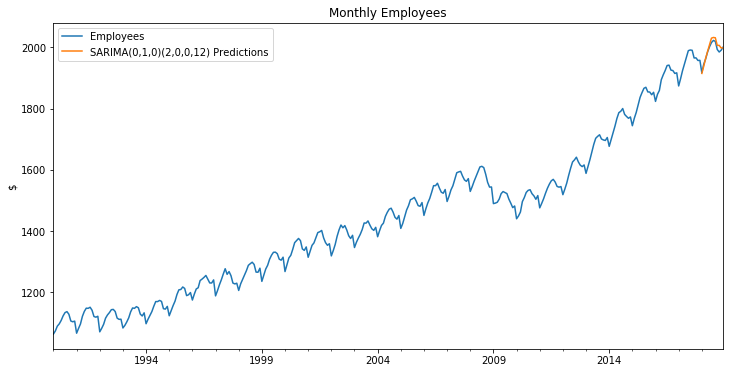

In [316]:
# Plot predictions over known values
title = 'Monthly Employees'
ylabel='$'
xlabel=''

ax = monthly_employee['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

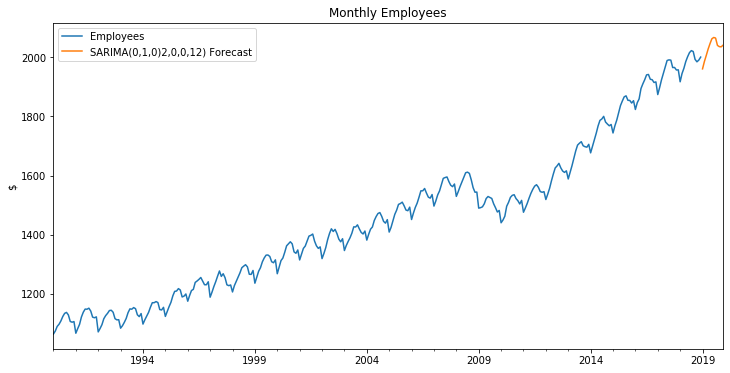

In [301]:
# Plot predictions after known values
title = 'Monthly Employees'
ylabel='$'
xlabel=''

ax = monthly_employee['Employees'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [263]:
# DON'T WRITE HERE

# 13 Write down a list of potential datasets that you would like to use as exogenous variables to improve your prediction.  


1. avg ratio of empty rooms over booked rooms
2. information on different companies to see if the differnet companies vary in employee value
3. company's earnings by month to see if the company's earning affect the employee hire rate


## Great job!